In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('Telco-Customer-Churn.csv')

In [188]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [189]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [190]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [191]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [192]:
def catch_variables(dataframe, cat_th = 10, car_th = 20):
    cat = [col for col in dataframe.columns if dataframe[col].dtypes == 'O' and dataframe[col].nunique() < cat_th]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].dtypes != 'O'
                   and dataframe[col].nunique() < cat_th]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].dtypes == 'O'
                   and dataframe[col].nunique() > car_th]
    cat = cat + num_but_cat
    cat = [col for col in cat if col not in cat_but_car]
    
    num = [col for col in dataframe.columns if dataframe[col].dtypes != 'O' and dataframe[col].nunique() > car_th]
    num = [col for col in num if col not in num_but_cat]
    
    return cat, cat_but_car, num

In [193]:
cat, cat_but_car, num = catch_variables(data)
print(cat)
print(cat_but_car)
print(num)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen']
['customerID', 'TotalCharges']
['tenure', 'MonthlyCharges']


In [194]:
for col in data.columns:
    print(col, data[col].nunique())

customerID 7043
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 73
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1585
TotalCharges 6531
Churn 2


In [195]:
def interq(dataframe, col_name, q1 = 0.05, q3 = 0.95):
    q1 = dataframe[col_name].quantile(q1)
    q3 = dataframe[col_name].quantile(q3)
    iqr = q3 - q1
    down = q1 - 1.5 * iqr
    up = q3 + 1.5 * iqr
    return down, up

In [196]:
def check_outliers(dataframe, col_name):
    down, up = interq(dataframe, col_name)
    if dataframe[(dataframe[col_name] < down) | (dataframe[col_name] > up)].any(axis = None):
        return True
    else:
        return False

In [197]:
for col in num:
    print(col, check_outliers(data, col))

tenure False
MonthlyCharges False


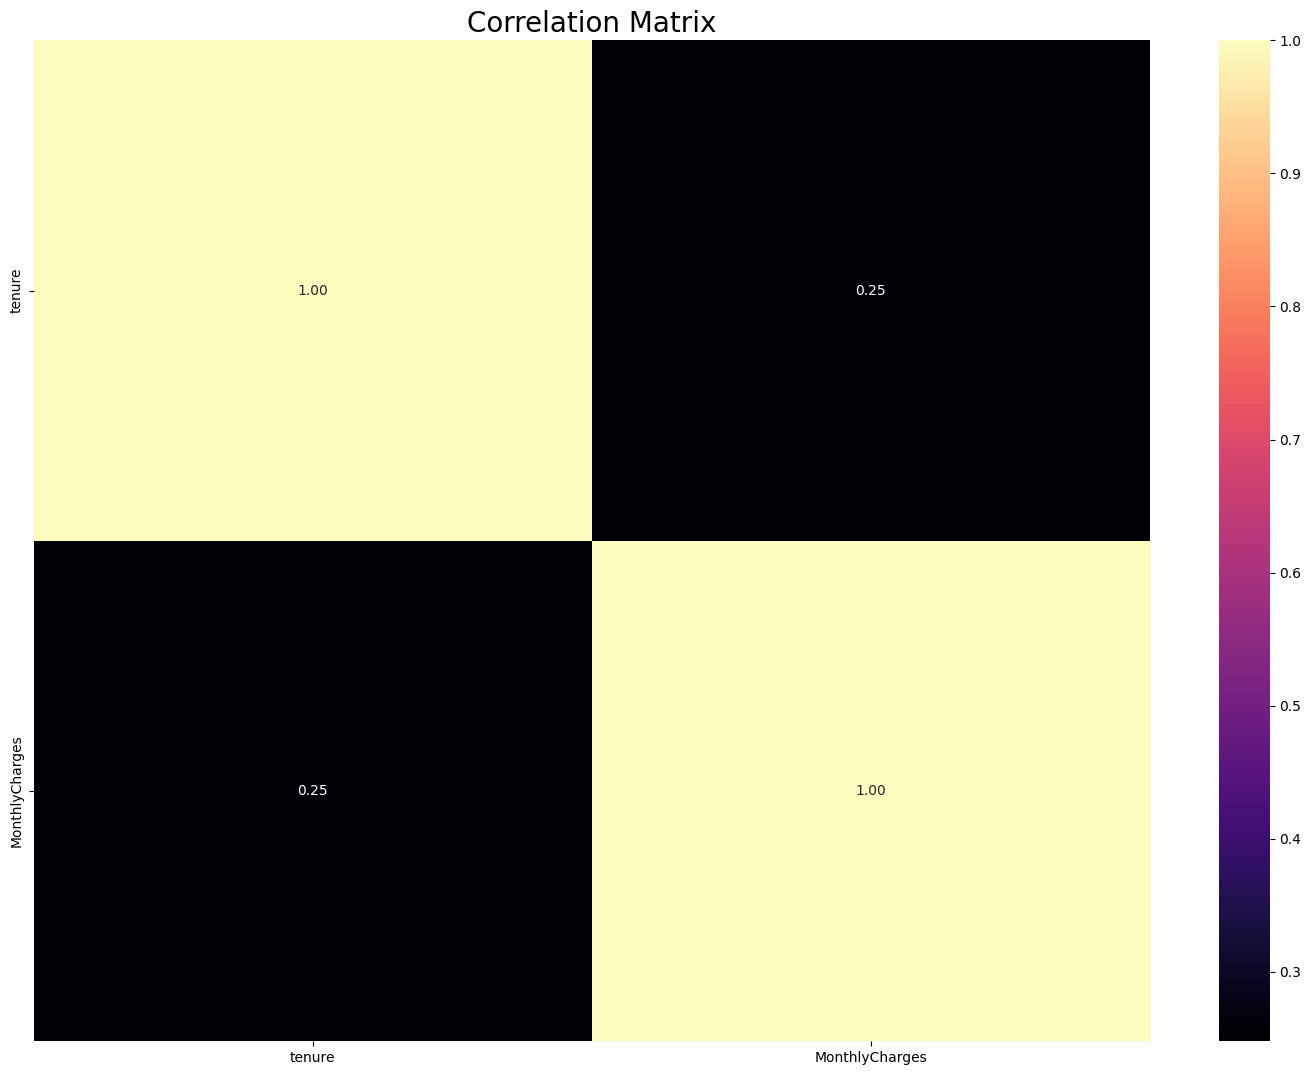

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(data[num].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show(block=True)

In [199]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [200]:
binary_cols = []
for col in cat :
    if data[col].nunique() == 2:
        binary_cols.append(col)

In [201]:
from sklearn.preprocessing import LabelEncoder
for col in cat:
    if data[col].nunique() == 2:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

In [202]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.5,0
7039,2234-XADUH,0,0,1,1,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,0,0,1,1,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.6,1


In [203]:
for col in cat:
    print(data.groupby(col)['Churn'].agg('mean'))

for col in num:
    print(data.groupby('Churn')[col].agg('mean'))    

gender
0    0.269209
1    0.261603
Name: Churn, dtype: float64
Partner
0    0.329580
1    0.196649
Name: Churn, dtype: float64
Dependents
0    0.312791
1    0.154502
Name: Churn, dtype: float64
PhoneService
0    0.249267
1    0.267096
Name: Churn, dtype: float64
MultipleLines
No                  0.250442
No phone service    0.249267
Yes                 0.286099
Name: Churn, dtype: float64
InternetService
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: Churn, dtype: float64
OnlineSecurity
No                     0.417667
No internet service    0.074050
Yes                    0.146112
Name: Churn, dtype: float64
OnlineBackup
No                     0.399288
No internet service    0.074050
Yes                    0.215315
Name: Churn, dtype: float64
DeviceProtection
No                     0.391276
No internet service    0.074050
Yes                    0.225021
Name: Churn, dtype: float64
TechSupport
No                     0.416355
No internet service    0.074050

In [204]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [205]:
data.drop(columns = 'customerID', inplace = True, axis = 1)

In [206]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.5,0
7039,0,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.9,0
7040,0,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.6,1


In [207]:
cat_cols = [col for col in cat if col not in binary_cols and col not in ["Churn", "NEW_TotalServices"]]
cat_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [208]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

data = one_hot_encoder(data, cat_cols, drop_first=True)

data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.5,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


In [209]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

<AxesSubplot: >

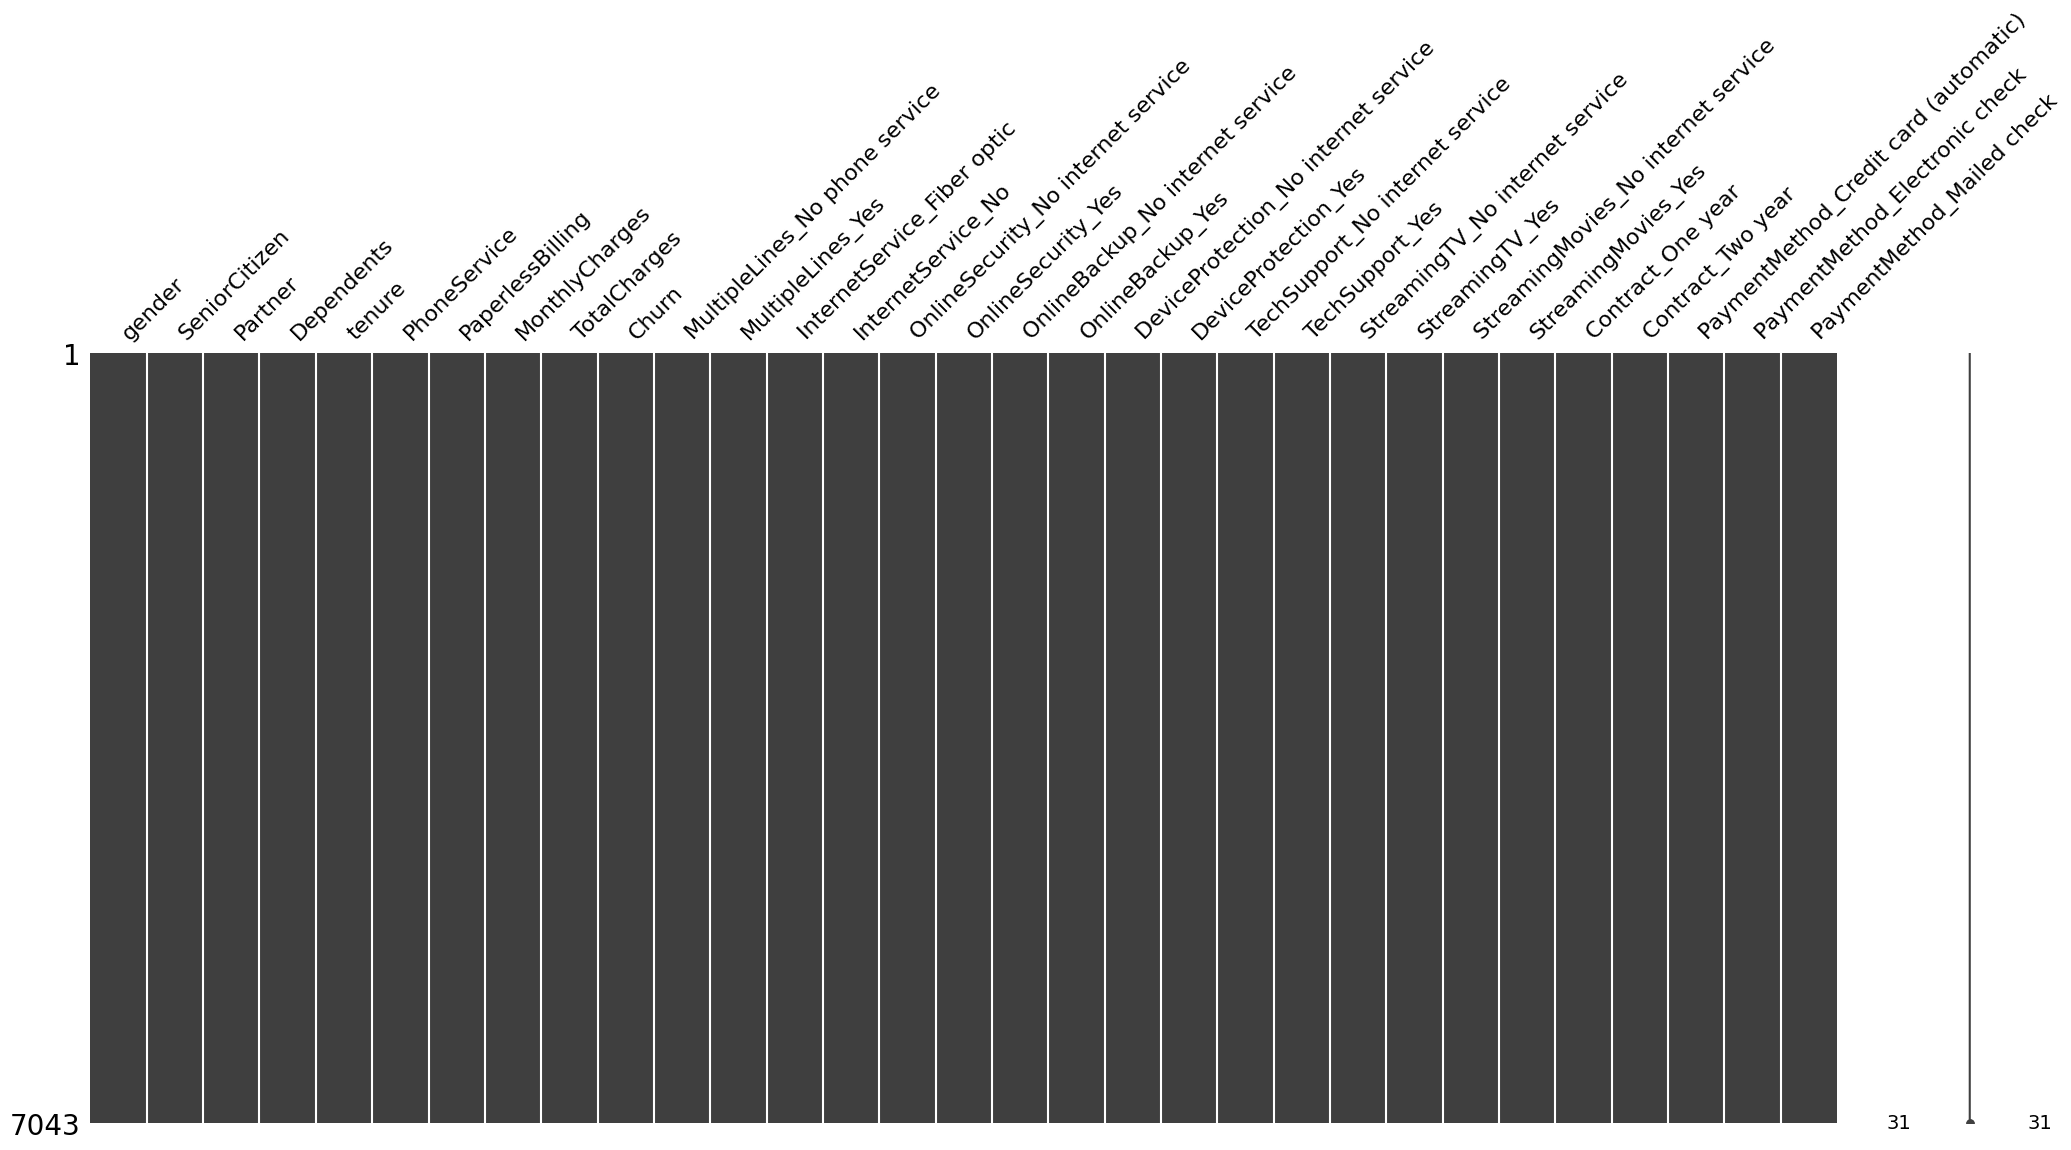

In [210]:
import missingno as msno
msno.matrix(data)

In [211]:
data[data["TotalCharges"].isnull()]["tenure"]
data["TotalCharges"].fillna(0, inplace=True)

data.isnull().sum()

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV

In [212]:
for col in data.columns:
    print(col, data[col].nunique())

gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 73
PhoneService 2
PaperlessBilling 2
MonthlyCharges 1585
TotalCharges 6531
Churn 2
MultipleLines_No phone service 2
MultipleLines_Yes 2
InternetService_Fiber optic 2
InternetService_No 2
OnlineSecurity_No internet service 2
OnlineSecurity_Yes 2
OnlineBackup_No internet service 2
OnlineBackup_Yes 2
DeviceProtection_No internet service 2
DeviceProtection_Yes 2
TechSupport_No internet service 2
TechSupport_Yes 2
StreamingTV_No internet service 2
StreamingTV_Yes 2
StreamingMovies_No internet service 2
StreamingMovies_Yes 2
Contract_One year 2
Contract_Two year 2
PaymentMethod_Credit card (automatic) 2
PaymentMethod_Electronic check 2
PaymentMethod_Mailed check 2


In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int32  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int32  
 3   Dependents                             7043 non-null   int32  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int32  
 6   PaperlessBilling                       7043 non-null   int32  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   object 
 9   Churn                                  7043 non-null   int32  
 10  MultipleLines_No phone service         7043 non-null   uint8  
 11  Mult

In [214]:
numeric = [col for col in data.columns if data[col].dtypes != 'O']

In [215]:
object = [col for col in data.columns if data[col].dtypes == 'O']
print(object)

['TotalCharges']


In [216]:
from sklearn.preprocessing import StandardScaler

selected_columns = numeric
selected_data = data[selected_columns]
sc = StandardScaler()
scaled_features = sc.fit_transform(selected_data)
data_scaled = pd.DataFrame(scaled_features, columns=selected_data.columns)

In [217]:
data_scaled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.829798,-1.160323,-0.601023,3.054010,...,-0.639439,-0.525927,-0.790132,-0.525927,-0.796070,-0.514249,-0.562975,-0.525047,1.406418,-0.544807
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-1.205113,-0.259629,-0.601023,-0.327438,...,-0.639439,-0.525927,-0.790132,-0.525927,-0.796070,1.944582,-0.562975,-0.525047,-0.711026,1.835513
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,0.829798,-0.362660,1.663829,-0.327438,...,-0.639439,-0.525927,-0.790132,-0.525927,-0.796070,-0.514249,-0.562975,-0.525047,-0.711026,1.835513
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,-1.205113,-0.746535,-0.601023,3.054010,...,1.563872,-0.525927,-0.790132,-0.525927,-0.796070,1.944582,-0.562975,-0.525047,-0.711026,-0.544807
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,0.829798,0.197365,1.663829,-0.327438,...,-0.639439,-0.525927,-0.790132,-0.525927,-0.796070,-0.514249,-0.562975,-0.525047,1.406418,-0.544807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,0.829798,0.665992,-0.601023,-0.327438,...,1.563872,-0.525927,1.265612,-0.525927,1.256171,1.944582,-0.562975,-0.525047,-0.711026,1.835513
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,0.829798,1.277533,-0.601023,-0.327438,...,-0.639439,-0.525927,1.265612,-0.525927,1.256171,1.944582,-0.562975,1.904590,-0.711026,-0.544807
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.829798,-1.168632,-0.601023,3.054010,...,-0.639439,-0.525927,-0.790132,-0.525927,-0.796070,-0.514249,-0.562975,-0.525047,1.406418,-0.544807
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,0.829798,0.320338,1.663829,-0.327438,...,-0.639439,-0.525927,-0.790132,-0.525927,-0.796070,-0.514249,-0.562975,-0.525047,-0.711026,1.835513


In [218]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.5,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.5,0,...,1,0,1,0,1,1,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,7362.9,0,...,0,0,1,0,1,1,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,0,0,0,0,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,306.6,1,...,0,0,0,0,0,0,0,0,0,1


In [219]:
def check_numeric(dataset,column):
    for value in dataset[column]:
        if not isinstance(value, (int, float)):
            return False
    return True
print(check_numeric(data, 'TotalCharges'))

False


In [225]:
data['TotalCharges'] = data['TotalCharges'].replace('', float('NaN'))
data['TotalCharges'] = data['TotalCharges'].fillna(0)

In [228]:
Y = data['Churn']
X = data.drop(columns = ['Churn','TotalCharges'], axis = 1)      

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score,accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.1)
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print('Predict', y_pred)

f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy Score:", accuracy)
print(f'F1 score {f1}')
print(f'Recall score {recall}')

Predict [1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0
 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1
 0 0 0 1 0 0 0 0 

c:\Users\s7522\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
